<a href="https://colab.research.google.com/github/np-helios/NishthaPandey_23fe10cse00774/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import kagglehub

path = kagglehub.dataset_download("dhrubangtalukdar/lung-cancer-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 86.9k/86.9k [00:00<00:00, 32.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dhrubangtalukdar/lung-cancer-prediction-dataset/versions/1


In [ ]:
import os
os.listdir(path)

['lung_cancer.csv']

In [ ]:
df = pd.read_csv(f"{path}/lung_cancer.csv")
df.head()

age  gender  education_years  income_level  smoker  smoking_years  \
0   60       1               20             2       1             16   
1   53       0               12             4       0              0   
2   62       1               15             3       1              9   
3   73       1               12             3       0              0   
4   52       1               13             1       0              0   

   cigarettes_per_day  pack_years  passive_smoking  air_pollution_index  ...  \
0                  15          12                0                   71  ...   
1                   0           0                1                   66  ...   
2                  29          13                1                   69  ...   
3                   0           0                0                   47  ...   
4                   0           0                0                   94  ...   

   bmi  oxygen_saturation  fev1_x10  crp_level  xray_abnormal  \
0   20                 94        29          6              1   
1   25                 96        35          4              0   
2   23                 95        29          9              1   
3   18                 96        32          0              0   
4   16                 97        36          8              0   

   exercise_hours_per_week  diet_quality  alcohol_units_per_week  \
0                        5             4                      13   
1                        5             2                       0   
2                        1             4                       2   
3                        0             3                      10   
4                        6             2                       9   

   healthcare_access  lung_cancer_risk  
0                  3                 1  
1                  3                 0  
2                  1                 1  
3                  4                 0  
4                  2                 0  

[5 rows x 30 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      5000 non-null   int64
 1   gender                   5000 non-null   int64
 2   education_years          5000 non-null   int64
 3   income_level             5000 non-null   int64
 4   smoker                   5000 non-null   int64
 5   smoking_years            5000 non-null   int64
 6   cigarettes_per_day       5000 non-null   int64
 7   pack_years               5000 non-null   int64
 8   passive_smoking          5000 non-null   int64
 9   air_pollution_index      5000 non-null   int64
 10  occupational_exposure    5000 non-null   int64
 11  radon_exposure           5000 non-null   int64
 12  family_history_cancer    5000 non-null   int64
 13  copd                     5000 non-null   int64
 14  asthma                   5000 non-null   int64
 15  prev

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      5000 non-null   int64
 1   gender                   5000 non-null   int64
 2   education_years          5000 non-null   int64
 3   income_level             5000 non-null   int64
 4   smoker                   5000 non-null   int64
 5   smoking_years            5000 non-null   int64
 6   cigarettes_per_day       5000 non-null   int64
 7   pack_years               5000 non-null   int64
 8   passive_smoking          5000 non-null   int64
 9   air_pollution_index      5000 non-null   int64
 10  occupational_exposure    5000 non-null   int64
 11  radon_exposure           5000 non-null   int64
 12  family_history_cancer    5000 non-null   int64
 13  copd                     5000 non-null   int64
 14  asthma                   5000 non-null   int64
 15  prev

In [ ]:
df.describe()

age       gender  education_years  income_level       smoker  \
count  5000.000000  5000.000000      5000.000000   5000.000000  5000.000000   
mean     54.566400     0.488200        11.510400      2.554400     0.454800   
std      11.932731     0.499911         2.953987      0.982667     0.498003   
min      18.000000     0.000000         5.000000      1.000000     0.000000   
25%      47.000000     0.000000        10.000000      2.000000     0.000000   
50%      55.000000     0.000000        11.000000      3.000000     0.000000   
75%      62.000000     1.000000        13.250000      3.000000     1.000000   
max      90.000000     1.000000        20.000000      5.000000     1.000000   

       smoking_years  cigarettes_per_day   pack_years  passive_smoking  \
count    5000.000000         5000.000000  5000.000000      5000.000000   
mean        8.822200            6.685600     6.249000         0.347600   
std        11.651598            9.032888     9.964901         0.476256   
min         0.000000            0.000000     0.000000         0.000000   
25%         0.000000            0.000000     0.000000         0.000000   
50%         0.000000            0.000000     0.000000         0.000000   
75%        18.000000           14.000000    10.000000         1.000000   
max        52.000000           44.000000    60.000000         1.000000   

       air_pollution_index  ...          bmi  oxygen_saturation     fev1_x10  \
count          5000.000000  ...  5000.000000        5000.000000  5000.000000   
mean             64.278800  ...    23.604800          96.089200    31.475800   
std              19.479809  ...     3.937222           3.412385     5.213679   
min              20.000000  ...    16.000000          85.000000     5.000000   
25%              51.000000  ...    21.000000          95.000000    30.000000   
50%              64.000000  ...    24.000000          97.000000    33.000000   
75%              78.000000  ...    26.000000          99.000000    35.000000   
max             130.000000  ...    37.000000         100.000000    37.000000   

         crp_level  xray_abnormal  exercise_hours_per_week  diet_quality  \
count  5000.000000    5000.000000              5000.000000   5000.000000   
mean      4.593600       0.201400                 2.580400      2.534800   
std       5.333566       0.401086                 1.834178      0.985385   
min       0.000000       0.000000                 0.000000      1.000000   
25%       1.000000       0.000000                 1.000000      2.000000   
50%       3.000000       0.000000                 2.000000      3.000000   
75%       7.000000       0.000000                 4.000000      3.000000   
max      33.000000       1.000000                10.000000      5.000000   

       alcohol_units_per_week  healthcare_access  lung_cancer_risk  
count               5000.0000        5000.000000       5000.000000  
mean                   5.8850           2.536800          0.248800  
std                    4.4239           0.984093          0.432361  
min                    0.0000           1.000000          0.000000  
25%                    2.0000           2.000000          0.000000  
50%                    6.0000           3.000000          0.000000  
75%                    9.0000           3.000000          0.000000  
max                   23.0000           5.000000          1.000000  

[8 rows x 30 columns]

In [ ]:
df.columns

Index(['age', 'gender', 'education_years', 'income_level', 'smoker',
       'smoking_years', 'cigarettes_per_day', 'pack_years', 'passive_smoking',
       'air_pollution_index', 'occupational_exposure', 'radon_exposure',
       'family_history_cancer', 'copd', 'asthma', 'previous_tb',
       'chronic_cough', 'chest_pain', 'shortness_of_breath', 'fatigue', 'bmi',
       'oxygen_saturation', 'fev1_x10', 'crp_level', 'xray_abnormal',
       'exercise_hours_per_week', 'diet_quality', 'alcohol_units_per_week',
       'healthcare_access', 'lung_cancer_risk'],
      dtype='object')

In [ ]:
sns.pairplot(df)

In [ ]:
print(df.isnull().sum())

age                        0
gender                     0
education_years            0
income_level               0
smoker                     0
smoking_years              0
cigarettes_per_day         0
pack_years                 0
passive_smoking            0
air_pollution_index        0
occupational_exposure      0
radon_exposure             0
family_history_cancer      0
copd                       0
asthma                     0
previous_tb                0
chronic_cough              0
chest_pain                 0
shortness_of_breath        0
fatigue                    0
bmi                        0
oxygen_saturation          0
fev1_x10                   0
crp_level                  0
xray_abnormal              0
exercise_hours_per_week    0
diet_quality               0
alcohol_units_per_week     0
healthcare_access          0
lung_cancer_risk           0
dtype: int64


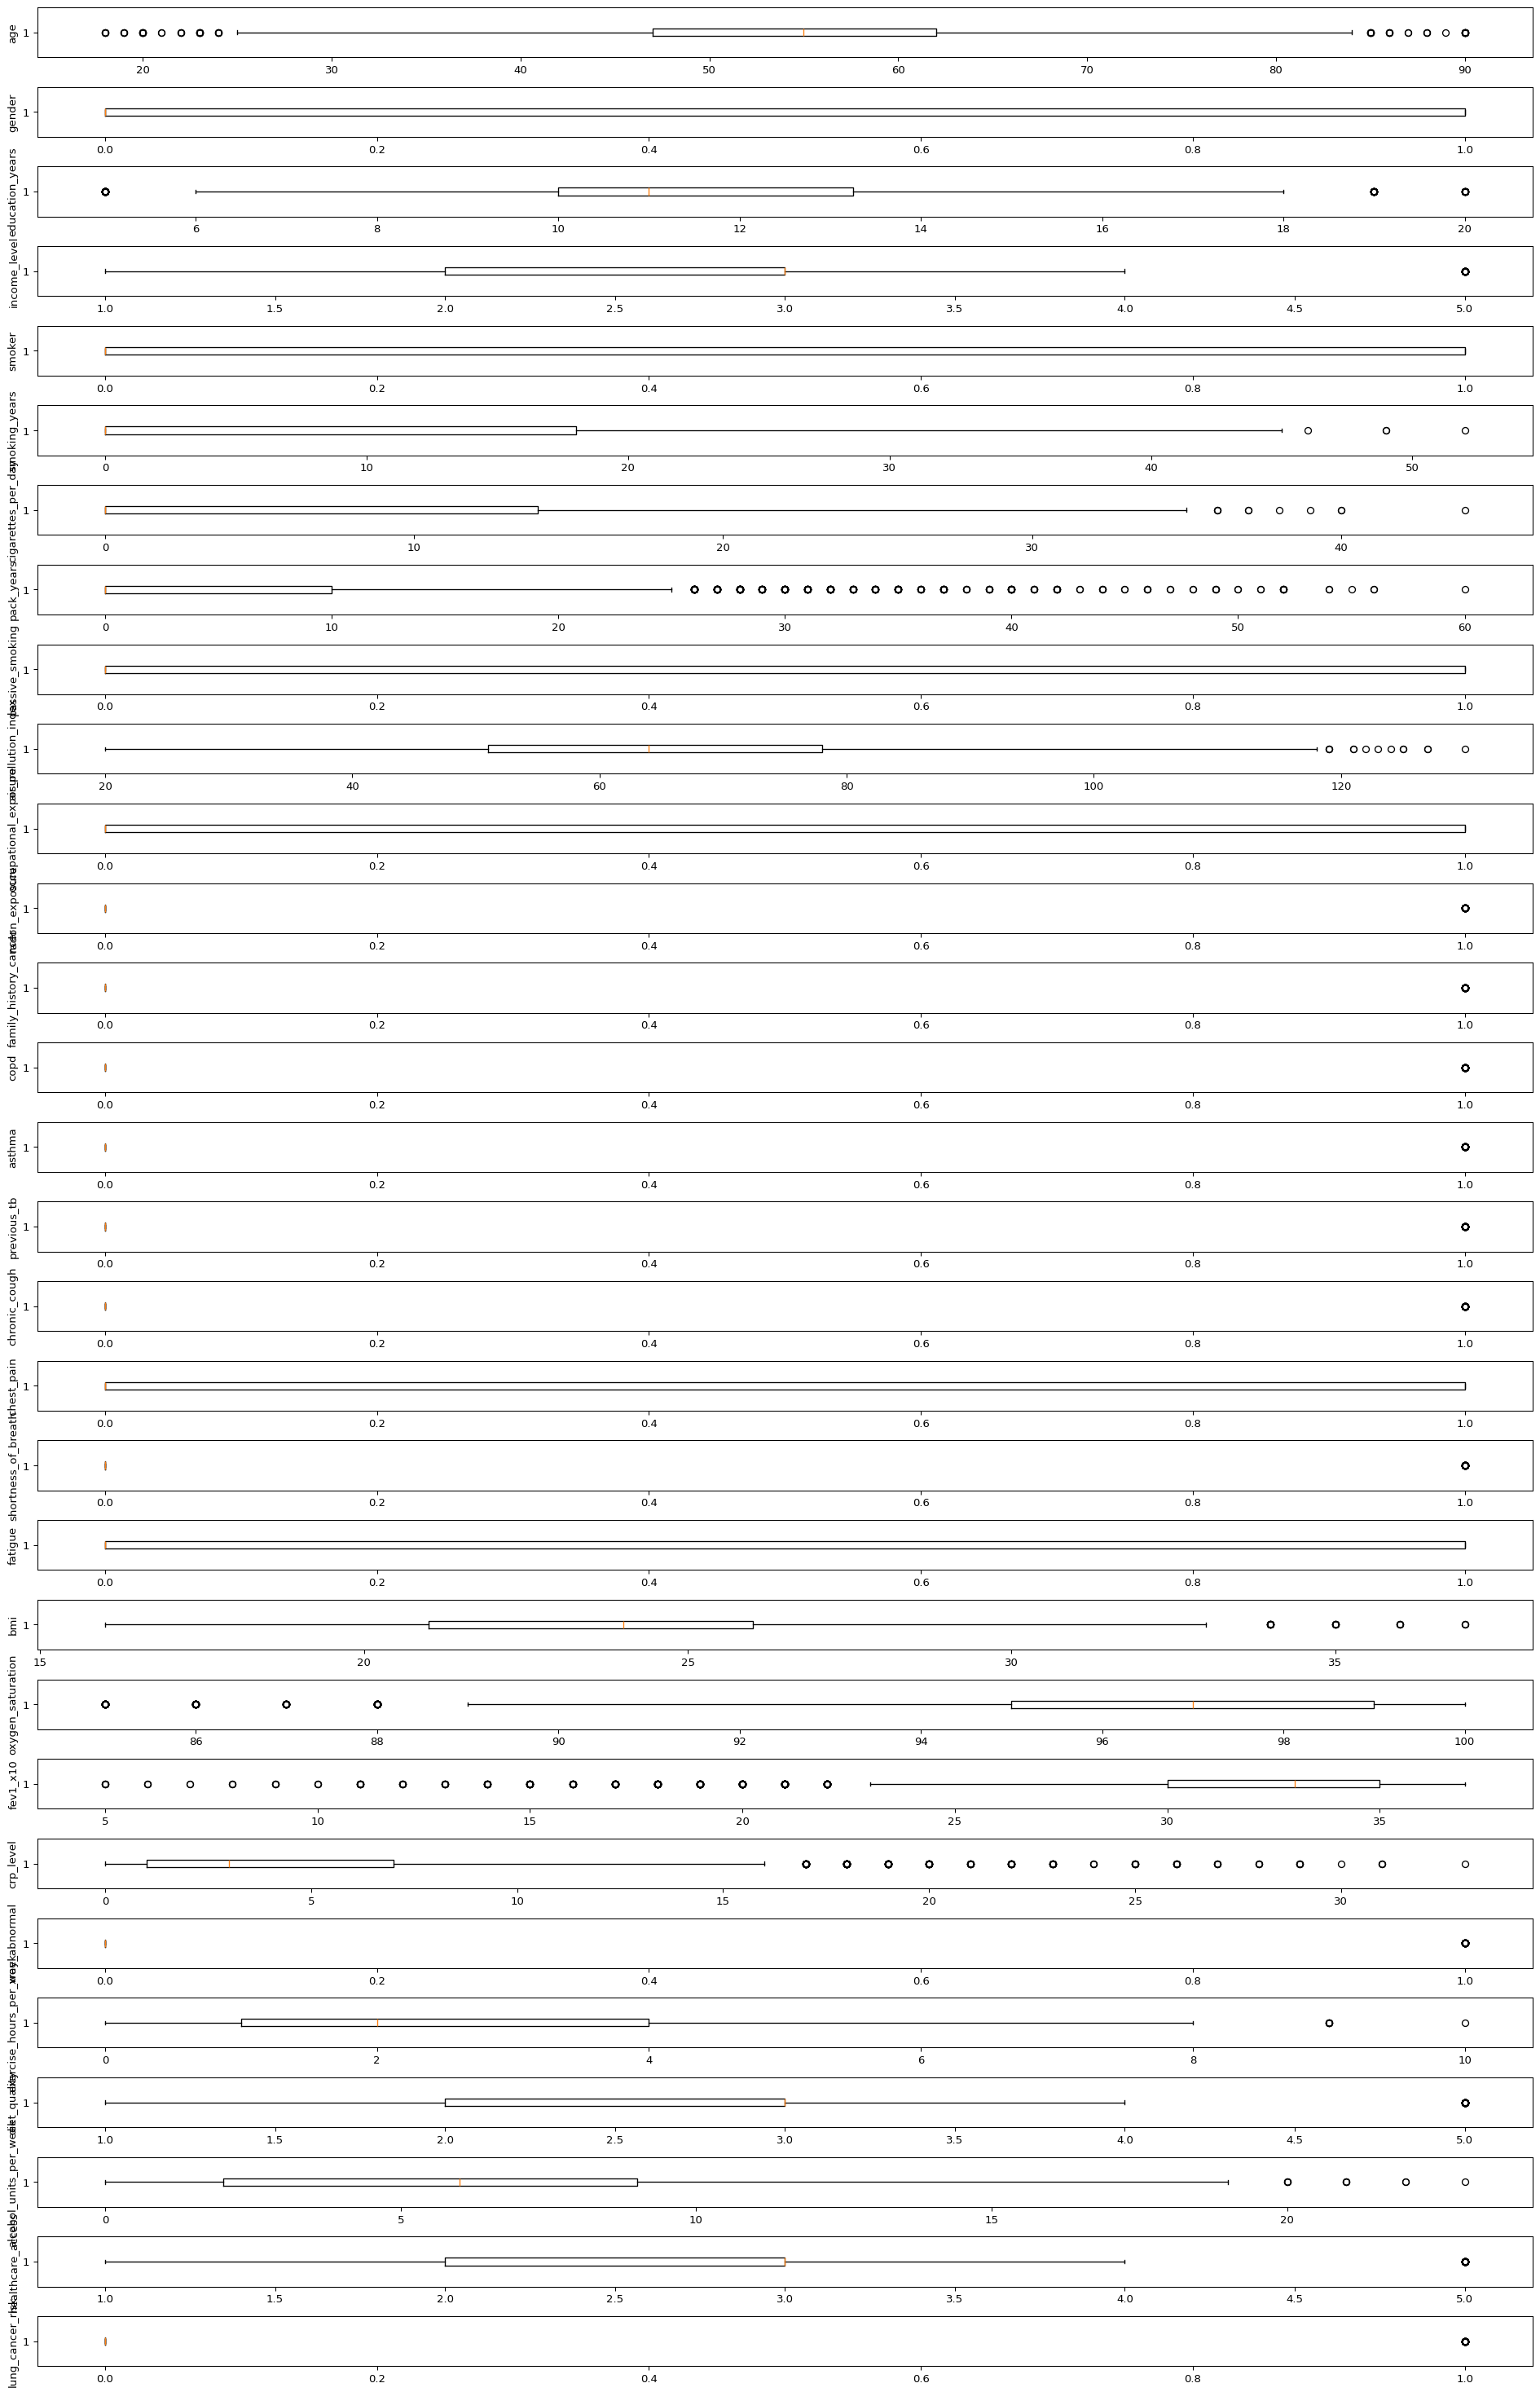

In [ ]:
df.describe()

fig, axs = plt.subplots(len(df.columns), 1, figsize=(20, 31), dpi=95)
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
for col in df.columns:
    print(f"\n{col}")
    print(df[col].unique())



age
[60 53 62 73 52 64 49 61 57 32 34 48 42 58 44 38 72 55 37 56 41 59 47 51
 77 54 40 31 39 63 46 67 33 50 66 71 23 45 65 84 68 81 43 36 70 35 87 90
 82 80 30 76 18 74 29 69 79 78 27 75 25 28 22 85 86 20 83 24 19 26 88 21
 89]

gender
[1 0]

education_years
[20 12 15 13 10 11 14  8 17 16  6  9  7 18  5 19]

income_level
[2 4 3 1 5]

pack_years
[12  0 13 26 28 15  8  7 30 17 36 20 10  4  3  9 37  5 14 24  6 32 34 29
 16 38 25 18 22 31 11 27 50 35 56 33 21  1  2 19 42 44 52 23 40 41 49 51
 45 54 55 48 39 43 46 47 60]

passive_smoking
[0 1]

air_pollution_index
[ 71  66  69  47  94  55  88 127  62 105  59  80  74  52  76  89 102  54
  67  61  42  43  57  34  64  68  70  72  73  95  48  49  78  87 103  63
  35  75  44  20  56  82  25  65  96  84  31  58  93  53  79  91  50  60
  41  45  86  36  40 101 104  51  39  97  33  38  92  32  81  46  26  98
  77  83 106  90  85  37  30  99 107  28  21  27  24  22 100  23 114 109
 110 115  29 112 113 108 125 119 121 118 117 130 111 116 124 123 122

In [ ]:
q1, q3 = np.percentile(df['pack_years'], [25, 75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
clean_df = df[(df['pack_years'] >= lower) & (df['pack_years'] <= upper)]

In [ ]:
continuous_cols = [
    'age', 'pack_years', 'air_pollution_index',
    'bmi', 'oxygen_saturation', 'fev1_x10',
    'crp_level', 'alcohol_units_per_week'
]

outlier_counts = {}

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count']) \
  .sort_values(by='Outlier_Count', ascending=False)


Outlier_Count
fev1_x10                          368
pack_years                        316
oxygen_saturation                 226
crp_level                         210
age                                66
bmi                                28
air_pollution_index                13
alcohol_units_per_week             11

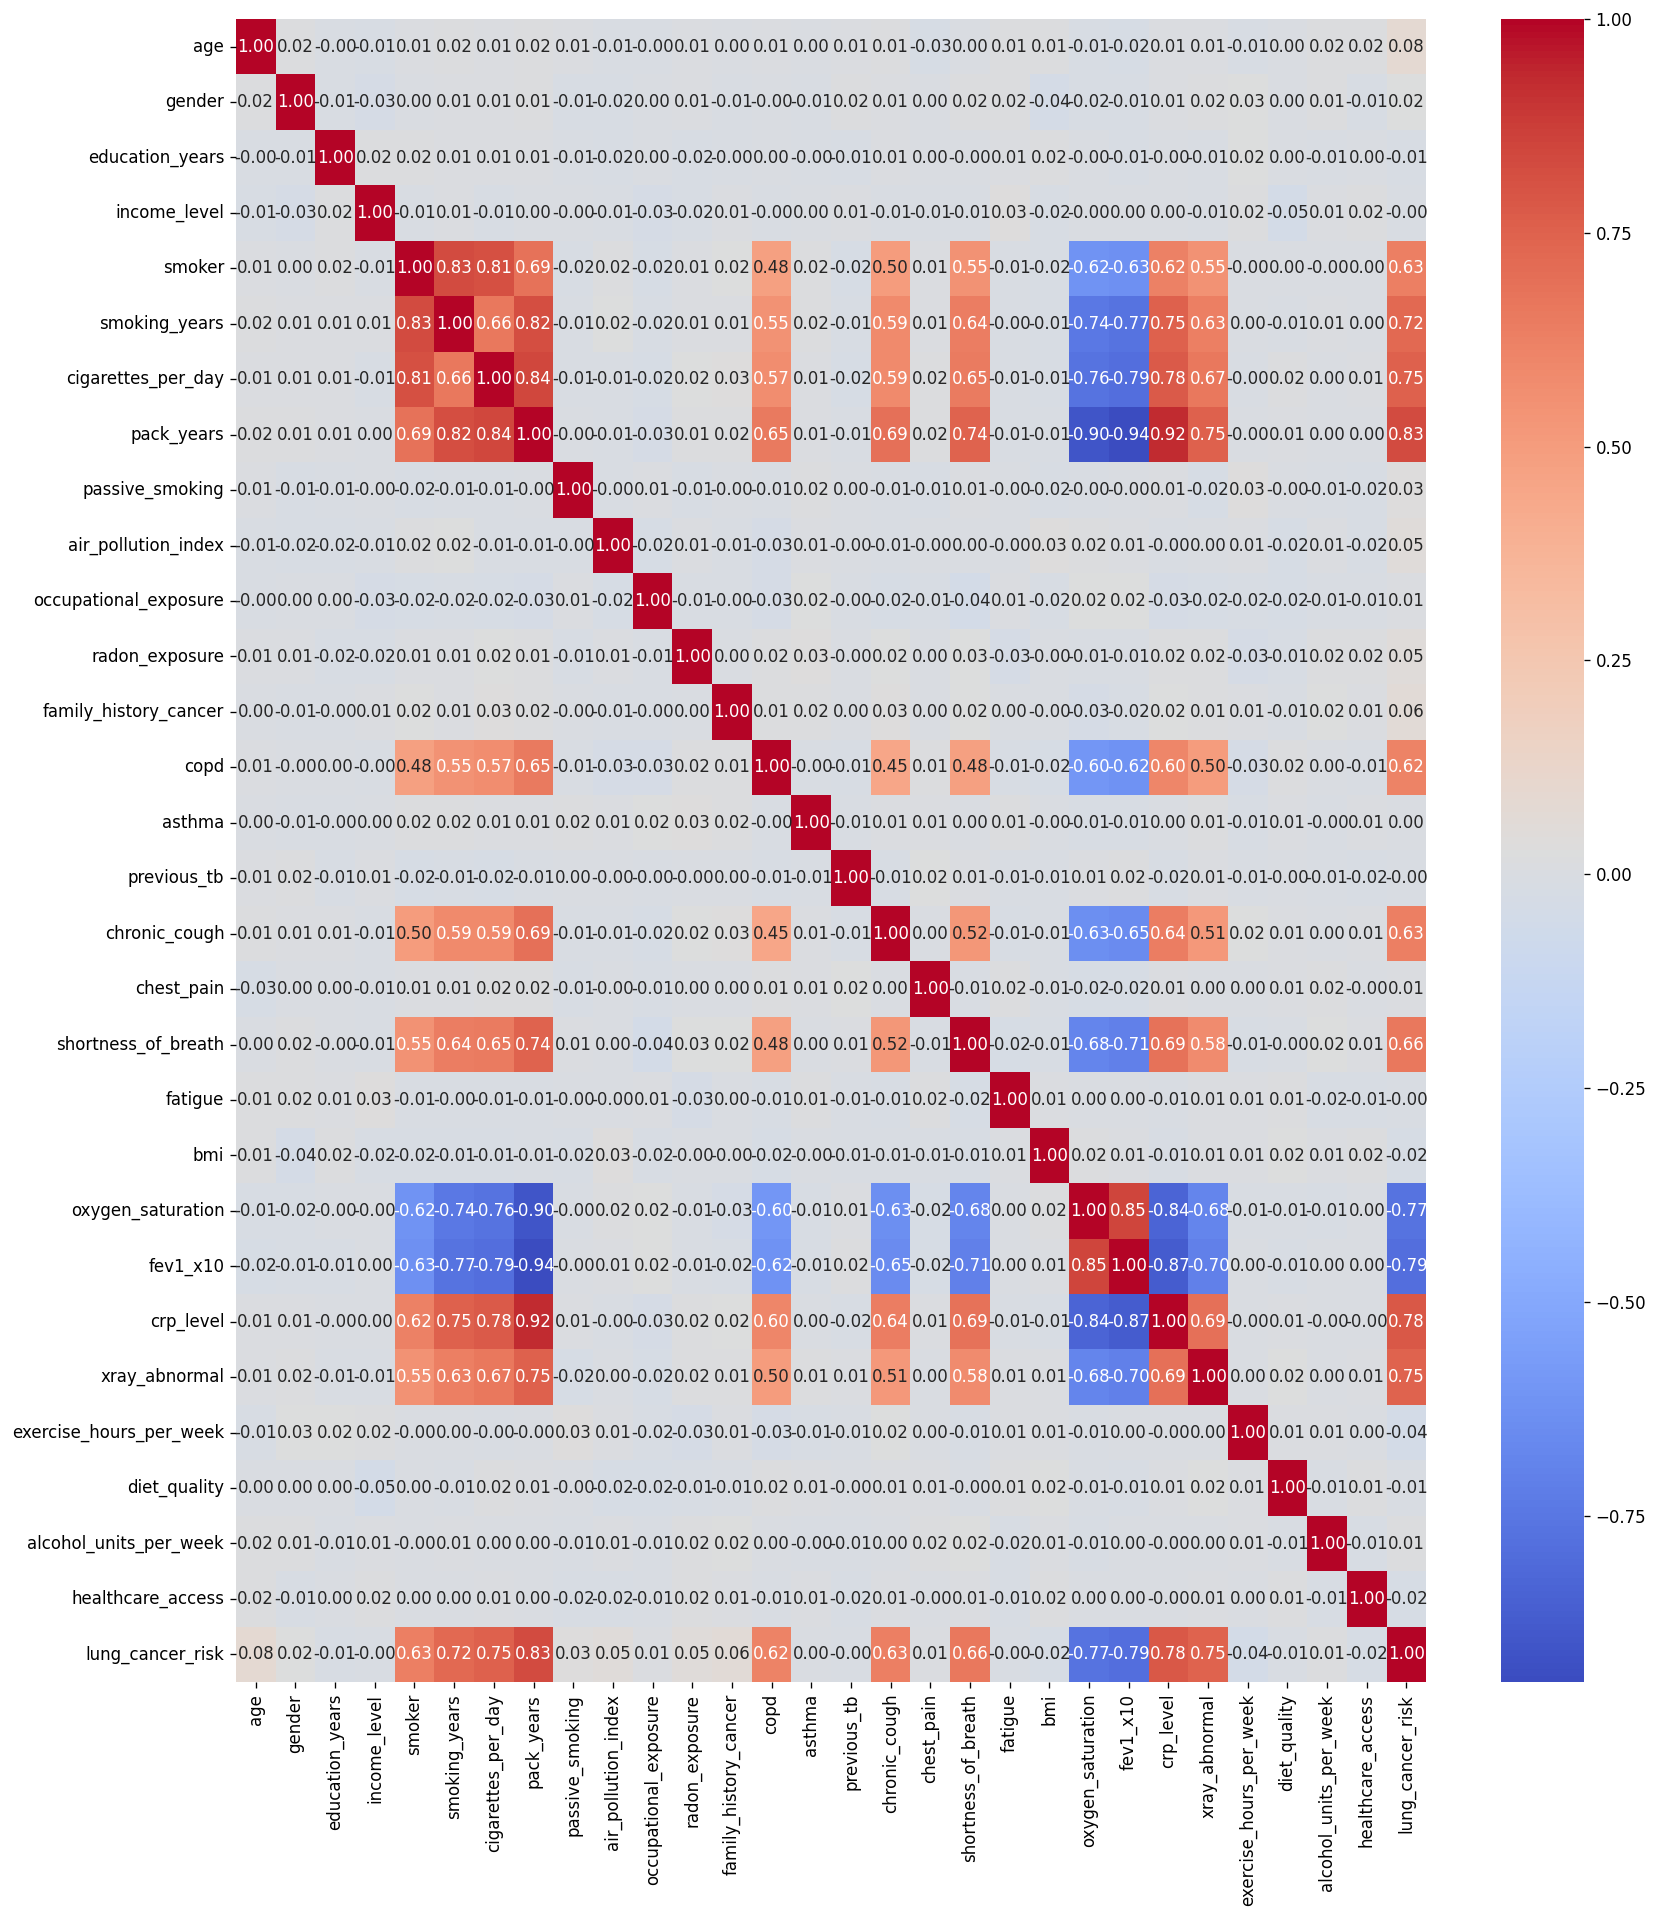

pack_years                 1.000000
crp_level                  0.924257
cigarettes_per_day         0.844534
lung_cancer_risk           0.830688
smoking_years              0.820470
xray_abnormal              0.749515
shortness_of_breath        0.743815
chronic_cough              0.689500
smoker                     0.686671
copd                       0.654711
family_history_cancer      0.019885
chest_pain                 0.019837
age                        0.015881
radon_exposure             0.014758
gender                     0.012938
asthma                     0.011069
diet_quality               0.009008
education_years            0.005461
alcohol_units_per_week     0.004502
healthcare_access          0.003115
income_level               0.001793
passive_smoking           -0.000327
exercise_hours_per_week   -0.001692
fatigue                   -0.006611
air_pollution_index       -0.009476
bmi                       -0.009652
previous_tb               -0.010085
occupational_exposure     -0

In [ ]:
corr = df.corr()
plt.figure(figsize=(16, 18), dpi=120)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

print(corr['pack_years'].sort_values(ascending=False))

In [ ]:
# X = df.drop(columns=['crp_level'])
# y = df['crp_level']

In [ ]:
# df = df.drop(columns=[
#     'smoking_years',
#     'cigarettes_per_day',
#     'smoker'
# ])


In [ ]:
df['pack_years'] = np.log1p(df['pack_years'])
df['crp_level'] = np.log1p(df['crp_level'])
df['alcohol_units_per_week'] = np.log1p(df['alcohol_units_per_week'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
print(X_normalized[:5])

[[0.58333333 1.         1.         0.25       1.         0.30769231
  0.34090909 0.2        0.         0.46363636 0.         1.
  0.         0.         0.         0.         1.         1.
  1.         0.         0.19047619 0.6        0.75       1.
  0.5        0.75       0.56521739 0.5        1.        ]
 [0.48611111 0.         0.46666667 0.75       0.         0.
  0.         0.         1.         0.41818182 0.         0.
  1.         0.         0.         0.         0.         1.
  0.         0.         0.42857143 0.73333333 0.9375     0.
  0.5        0.25       0.         0.5        0.        ]
 [0.61111111 1.         0.66666667 0.5        1.         0.17307692
  0.65909091 0.21666667 1.         0.44545455 0.         0.
  0.         0.         1.         0.         0.         0.
  1.         1.         0.33333333 0.66666667 0.75       1.
  0.1        0.75       0.08695652 0.         1.        ]
 [0.76388889 1.         0.46666667 0.5        0.         0.
  0.         0.         0.    

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])

[[ 0.45539813  1.02388517  2.87423409 -0.56423553  1.09488296  0.61609728
   0.92055069  0.57718335 -0.72993285  0.34506869 -0.57858195  2.43024224
  -0.50530701 -0.4354612  -0.41579195 -0.31716608  2.18946175  1.72744428
   1.99625772 -0.81411721 -0.91566097 -0.61230162 -0.47491369  1.99129187
   1.31930603  1.48708056  1.60847035  0.4707342   1.73761118]
 [-0.13128232 -0.97667202  0.16575869  1.47124619 -0.91333963 -0.75724225
  -0.74021381 -0.62716376  1.36998904  0.08836699 -0.57858195 -0.41148161
   1.97899491 -0.4354612  -0.41579195 -0.31716608 -0.45673326  1.72744428
  -0.50093733 -0.81411721  0.35439697 -0.02614269  0.6760202  -0.50218655
   1.31930603 -0.54278643 -1.33040731  0.4707342  -0.57550274]
 [ 0.62302112  1.02388517  1.18143697  0.45350533  1.09488296  0.01526124
   2.47059755  0.67754561  1.36998904  0.24238801 -0.57858195 -0.41148161
  -0.50530701 -0.4354612   2.40504896 -0.31716608 -0.45673326 -0.57888987
   1.99625772  1.22832436 -0.15362621 -0.31922216 -0.4749136